<a href="https://colab.research.google.com/github/OlyaMizonova/Labs-in-colab/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_%D0%BF%D0%BE_%D1%81%D0%BE%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%BC%D1%83_%D0%B5%D1%81%D1%82%D0%B5%D1%81%D1%82%D0%B2%D0%BE%D0%B7%D0%BD%D0%B0%D0%BD%D0%B8%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$L=K-U$$
$$U(x)=\frac{x^6}{6}-\frac{5x^4}{4}+2x^2$$
$$K=\frac{m\dot{x}^{2}}{2}$$
$$L=\frac{m\dot{x}^{2}}{2}-\frac{x^6}{6}+\frac{5x^4}{4}-2x^2 \\
\text{Уравнение движения: } \\ \ddot{x}+α\dot{x}+x^5-5x^3+4x=0
$$

$$
\left \lbrace
\begin{matrix}
\dot{x}=y \\
\dot{y}=-αy-x^5+5x^3-4x
\end{matrix}
\right.
$$

Состояния равновесия (0, 0), (-2, 0), (2, 0), (-1, 0), (1, 0)

В зависимости от параметра $α$ можно выделить следующие области:
(-1, 0), (1, 0) - сёдла вне зависимости от $α$


1.  при $α\in (-\infty, -4\sqrt{6})$ - (0, 0), (-2, 0), (2, 0) - неустойчивые узлы
2.   при $α = -4\sqrt{6}$ - (0, 0) - неустойчивый узел, (-2, 0), (2, 0) - вырожденные неустойчивые узлы
3. при $α\in (-4\sqrt{6}, -4)$ - (0, 0) - неустойчивый узел, (-2, 0), (2, 0) - неустойчивые фокусы
4. при $α=-4$ - (0, 0) - неустойчивый вырожденный узел, (-2, 0), (2, 0) - неустойчивые фокусы
5. при $α\in (-4, 0)$ - (0, 0), (-2, 0), (2, 0) - неустойчивые фокусы
6. при $α = 0$ - (0, 0), (-2, 0), (2, 0) - центры
7. при $α\in (0, 4)$ - (0, 0), (-2, 0), (2, 0) - устойчивые фокусы
8. при $α=4$ - (0, 0) - устойчивый вырожденный узел, (-2, 0), (2, 0) - устойчивые фокусы
9. при $α\in (4,4\sqrt{6})$ - (0, 0) - устойчивый узел, (-2, 0), (2, 0) - устойчивые фокусы
10. при $α = 4\sqrt{6}$ - (0, 0) - устойчивый узел, (-2, 0), (2, 0) - вырожденные устойчивые узлы
11. при $α\in (4\sqrt{6},+\infty)$ - (0, 0), (-2, 0), (2, 0) - устойчивые узлы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.linalg import eig

In [ ]:
def funct(alpha):
  def rhss(t, X):
    x, y = X
    return [y, -alpha*y-x**5+5*x**3-4*x]
  return rhss

In [ ]:
def F_vect_num(X, alpha):#получить собственные векторы и собственные числа
  x, y = X
  a = np.array([[0, 1], [-5*x**4+15*x**2-4,-alpha]])
  w, v = eig(a)#numbers w = [p1,p2], vectors v = [[a11,a12],[a21,a22]]
  return [w, v]

In [ ]:
def eq_quiver(rhs, limits, N=25):
  xlims,ylims = limits
  xs = np.linspace(xlims[0], xlims[1], N)
  ys = np.linspace(ylims[0], ylims[1], N)
  U = np.zeros((N,N))
  V = np.zeros((N,N))
  for i,y in enumerate(ys):
    for j,x in enumerate(xs):
      vfield = rhs(0.,[x,y])
      u,v = vfield
      U[i][j] = u
      V[i][j] = v
  return (xs, ys, U, V)
def plotonPlane(rhs,limits):
  plt.close()
  xlims,ylims=limits
  plt.xlim(xlims[0],xlims[1])
  plt.ylim(ylims[0],ylims[1])
  # u,v -векторы по икс и игрек в каждом узле
  xs,ys,U,V=eq_quiver(rhs,limits)
  plt.quiver(xs,ys,U,V)

In [ ]:
def drawSedlo(x,y, alph):
  wmin1,vmin1=F_vect_num((x,y),alph)
  if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
    a=1
    b=0
  else:
    b=1
    a=0
  Solmin11 = solve_ivp(rhs, [0,1], (x + vmin1[a][0]*0.01, y + vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
  x1,y1=Solmin11.y
  plt.plot(x1,y1,color='red',linestyle='dashed')
  Solmin12 = solve_ivp(rhs, [0,1], (x - vmin1[a][0]*0.01, y - vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
  x2,y2=Solmin12.y
  plt.plot(x2,y2,color='red',linestyle='dashed')
  Solmin13 = solve_ivp(rhs, [0,-5], (x + vmin1[b][0]*0.01, y + vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
  x3,y3=Solmin13.y
  plt.plot(x3,y3,color='red',linestyle='dashed')
  Solmin14 = solve_ivp(rhs, [0,-5], (x - vmin1[b][0]*0.01, y - vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
  x4,y4=Solmin14.y
  plt.plot(x4,y4,color='red',linestyle='dashed')

In [ ]:
def drawCentre(x,y,alph):
  Sol0 = solve_ivp(rhs, [0,5], (x+0.05,y+0.05), method='RK45', rtol=1e-12)
  x1, y1 = Sol0.y
  plt.plot(x1, y1, 'g-')
  Solpl2 = solve_ivp(rhs, [0,5], (x+0.2,y+0.2), method='RK45', rtol=1e-12)
  x2,y2=Solpl2.y
  plt.plot(x2, y2, 'g-')
  Solm2 = solve_ivp(rhs, [0,5], (x+0.5,y+0.5), method='RK45', rtol=1e-12)
  x3,y3=Solm2.y
  plt.plot(x3, y3, 'g-')

In [ ]:
def sedlo1(x, alpha):
  y=0
  #alpha=-10
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((x,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin11 = solve_ivp(rhs, [0,2], (x + vmin1[a][0]*0.01, y + vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x1,y1=Solmin11.y
    plt.plot(x1,y1,color='red',linestyle='dashed')
    Solmin12 = solve_ivp(rhs, [0,2], (x - vmin1[a][0]*0.01, y - vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x2,y2=Solmin12.y
    plt.plot(x2,y2,color='red',linestyle='dashed')
    Solmin13 = solve_ivp(rhs, [0,-15], (x + vmin1[b][0]*0.01, y + vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x3,y3=Solmin13.y
    plt.plot(x3,y3,color='red',linestyle='dashed')#+
    Solmin14 = solve_ivp(rhs, [0,-15], (x - vmin1[b][0]*0.01, y - vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x4,y4=Solmin14.y
    plt.plot(x4,y4,color='red',linestyle='dashed')#+

In [ ]:
def sedlo2(x, alpha):
  y=0
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((x,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin11 = solve_ivp(rhs, [0,5], (x + vmin1[a][0]*0.01, y + vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x1,y1=Solmin11.y
    plt.plot(x1,y1,color='red',linestyle='dashed')
    Solmin12 = solve_ivp(rhs, [0,5], (x - vmin1[a][0]*0.01, y - vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x2,y2=Solmin12.y
    plt.plot(x2,y2,color='red',linestyle='dashed')
    Solmin13 = solve_ivp(rhs, [0,-8], (x + vmin1[b][0]*0.01, y + vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x3,y3=Solmin13.y
    plt.plot(x3,y3,color='red',linestyle='dashed')#+
    Solmin14 = solve_ivp(rhs, [0,-8], (x - vmin1[b][0]*0.01, y - vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x4,y4=Solmin14.y
    plt.plot(x4,y4,color='red',linestyle='dashed')#+

In [ ]:
def sedlo3(x, alpha):
  y=0
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((x,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin11 = solve_ivp(rhs, [0,8], (x + vmin1[a][0]*0.01, y + vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x1,y1=Solmin11.y
    plt.plot(x1,y1,color='red',linestyle='dashed')
    Solmin12 = solve_ivp(rhs, [0,8], (x - vmin1[a][0]*0.01, y - vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x2,y2=Solmin12.y
    plt.plot(x2,y2,color='red',linestyle='dashed')
    Solmin13 = solve_ivp(rhs, [0,-3], (x + vmin1[b][0]*0.01, y + vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x3,y3=Solmin13.y
    plt.plot(x3,y3,color='red',linestyle='dashed')#+
    Solmin14 = solve_ivp(rhs, [0,-3], (x - vmin1[b][0]*0.01, y - vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x4,y4=Solmin14.y
    plt.plot(x4,y4,color='red',linestyle='dashed')#+

In [ ]:
def sedlo4(x, alpha):
  y=0
  #alpha=-10
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((x,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin11 = solve_ivp(rhs, [0,15], (x + vmin1[a][0]*0.01, y + vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x1,y1=Solmin11.y
    plt.plot(x1,y1,color='red',linestyle='dashed')
    Solmin12 = solve_ivp(rhs, [0,15], (x - vmin1[a][0]*0.01, y - vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x2,y2=Solmin12.y
    plt.plot(x2,y2,color='red',linestyle='dashed')
    Solmin13 = solve_ivp(rhs, [0,-1], (x + vmin1[b][0]*0.01, y + vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x3,y3=Solmin13.y
    plt.plot(x3,y3,color='red',linestyle='dashed')#+
    Solmin14 = solve_ivp(rhs, [0,-1], (x - vmin1[b][0]*0.01, y - vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x4,y4=Solmin14.y
    plt.plot(x4,y4,color='red',linestyle='dashed')#+

In [ ]:
def node1(x, alpha):
  y=0
  #alpha=-10
  rhs=funct(alpha)
  w,v=F_vect_num((x,y),alpha)
  if(w[0]>0):# неустойчивый узел
    timeSp=[0,2]
  else:#устойчивый узел
      timeSp=[0,-2]
  if(abs(w[0])<abs(w[1])):#для ведущего направления берем первый собственный вектор
      a=0
  else: #для ведущего направления берем второй собственный вектор
      a=1
  SolVed1 = solve_ivp(rhs, timeSp, (x + v[a][0]*0.01, y + v[a][1]*0.01), method='RK45', rtol=1e-8)
  xv1,yv1=SolVed1.y
  plt.plot(xv1,yv1,color='orange')
  SolVed2 = solve_ivp(rhs, timeSp, (x - v[a][0]*0.01, y - v[a][1]*0.01), method='RK45', rtol=1e-8)
  xv2,yv2=SolVed2.y
  plt.plot(xv2,yv2,color='orange')

In [ ]:
def focus1(x, alpha):
  #alpha=4.5
  rhs = funct(alpha)
  y=0
  timeSp=[0,2]
  if(alpha<0):#неустойчивый фокус
    timeSp=[0,3]
  if(alpha>0):#устойчивый фокус
    timeSp=[0,-2]
  Solmin11 = solve_ivp(rhs, timeSp, (x + 0.02, y + 0.01), method='RK45', rtol=1e-8)
  x1,y1=Solmin11.y
  plt.plot(x1,y1,color='orange')
  Solmin12 = solve_ivp(rhs, timeSp, (x - 0.01, y - 0.03), method='RK45', rtol=1e-8)
  x2,y2=Solmin12.y
  plt.plot(x2,y2,color='orange')
  Solmin13 = solve_ivp(rhs, timeSp, (x + .03, y + .02), method='RK45', rtol=1e-8)
  x3,y3=Solmin13.y
  plt.plot(x3,y3,color='orange')

In [ ]:
def focus2(x, alpha):
  rhs = funct(alpha)
  y=0
  timeSp=[0,2]
  if(alpha<0):#неустойчивый фокус
    timeSp=[0,6]
  if(alpha>0):#устойчивый фокус
    timeSp=[0,-6]
  Solmin11 = solve_ivp(rhs, timeSp, (x + 0.02, y + 0.01), method='RK45', rtol=1e-8)
  x1,y1=Solmin11.y
  plt.plot(x1,y1,color='orange')
  Solmin12 = solve_ivp(rhs, timeSp, (x - 0.01, y - 0.03), method='RK45', rtol=1e-8)
  x2,y2=Solmin12.y
  plt.plot(x2,y2,color='orange')
  Solmin13 = solve_ivp(rhs, timeSp, (x + .03, y + .02), method='RK45', rtol=1e-8)
  x3,y3=Solmin13.y
  plt.plot(x3,y3,color='orange')

1. $α\in (-\infty, -4\sqrt{6})$ $$ $$
$α = -10$

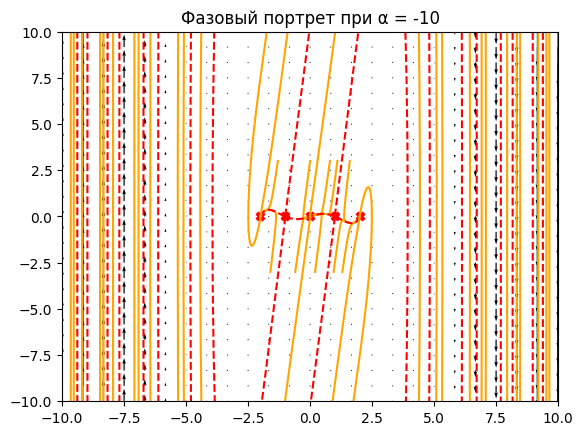

In [ ]:
def phase1():
  alpha=-10
  rhs = funct(alpha)
  plotonPlane(rhs,[[-10,10],[-10,10]])
  plt.scatter(0,0, color='red', marker='X')
  plt.scatter(2,0, color='red', marker='X')
  plt.scatter(-2,0, color='red', marker='X')
  plt.scatter(-1,0, color='red', marker='X')
  plt.scatter(1,0, color='red', marker='X')
  plt.title('Фазовый портрет при α = -10')
  #sedlo 1

  Sol = solve_ivp(rhs, [0,-10], (-1.6, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (-1.3, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (1.3, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (1.6, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (0.2, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (0.8, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (-0.6, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (0, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (0.95, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (1.1, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  sedlo1(-1, alpha)
  sedlo1(1, alpha)
  node1(0, alpha)
  node1(2, alpha)
  node1(-2, alpha)



phase1()


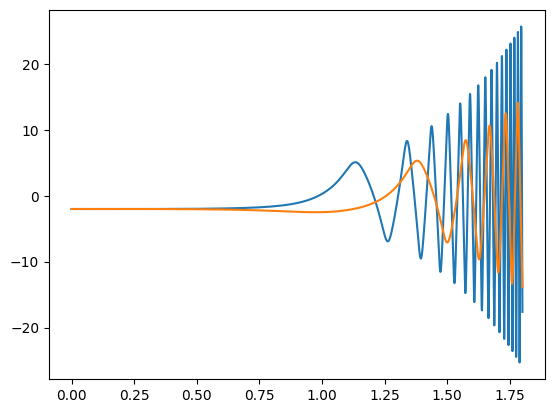

In [ ]:
def draw1():
  plt.close()
  alpha=-10
  rhs = funct(alpha)
  y=0
  rhs=funct(alpha)
  w,v=F_vect_num((-2,y),alpha)
  if(w[0]>0):# неустойчивый узел
    timeSp=[0,1.8]
  else:#устойчивый узел
      timeSp=[0,-1.8]
  if(abs(w[0])<abs(w[1])):#для ведущего направления берем первый собственный вектор
      a=0
  else: #для ведущего направления берем второй собственный вектор
      a=1
  SolVed1 = solve_ivp(rhs, timeSp, (-2 + v[a][0]*0.01, y + v[a][1]*0.01), method='RK45', rtol=1e-8)
  xv1,yv1=SolVed1.y
  timv1=SolVed1.t
  plt.plot(timv1,xv1)
  SolVed2 = solve_ivp(rhs, timeSp, (-2 - v[a][0]*0.01, y - v[a][1]*0.01), method='RK45', rtol=1e-8)
  xv2,yv2=SolVed2.y
  timv2=SolVed2.t
  plt.plot(timv2,xv2)

draw1()

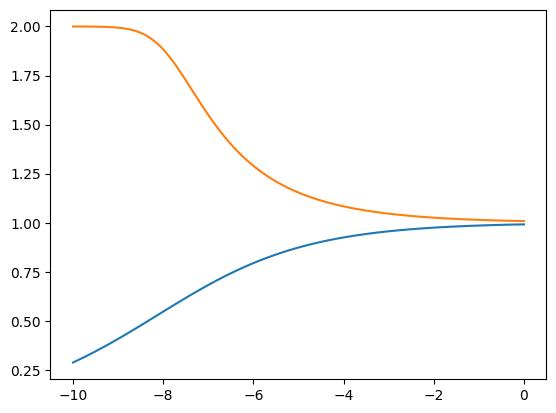

In [ ]:
def draw11():
  y=0
  alpha=-10
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((1,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin11 = solve_ivp(rhs, [0,-10], (1 + vmin1[b][0]*0.01, y + vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x1,y1=Solmin11.y
    tim1 = Solmin11.t
    plt.plot(tim1,x1)
    Solmin12 = solve_ivp(rhs, [0,-10], (1 - vmin1[b][0]*0.01, y - vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x2,y2=Solmin12.y
    tim2 = Solmin12.t
    plt.plot(tim2,x2)

draw11()

2. $α\in (-4\sqrt{6},-4)$

In [ ]:
alpha=-4.5
rhs = funct(alpha)

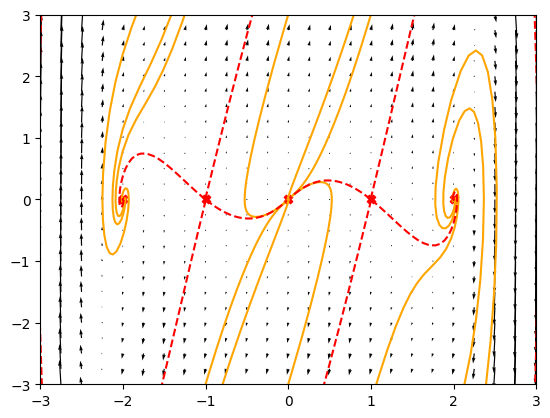

In [ ]:
def phase2():
  alpha=-4.5
  rhs = funct(alpha)
  plt.close()
  plotonPlane(rhs,[[-3,3],[-3,3]])
  plt.scatter(0,0, color='red', marker='X')
  plt.scatter(2,0, color='red', marker='X')
  plt.scatter(-2,0, color='red', marker='X')

  plt.scatter(-1,0, color='red', marker='X')
  plt.scatter(1,0, color='red', marker='X')

  Sol = solve_ivp(rhs, [0,-10], (0., -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (0, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (1, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,-10], (-1, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  focus1(2, alpha)
  focus1(-2,alpha)
  sedlo1(-1, alpha)
  sedlo1(1, alpha)
  node1(0,alpha)
phase2()

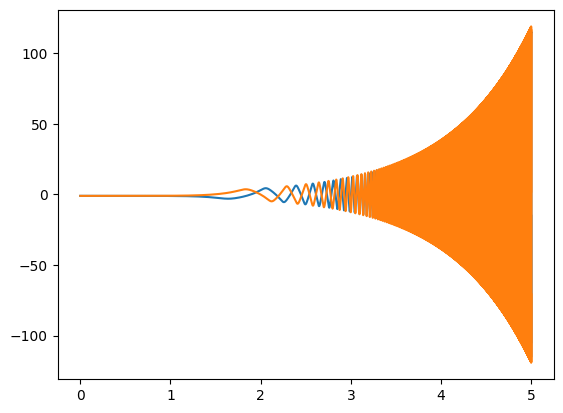

In [ ]:
def draw222():
  y=0
  x=-1
  alpha=-4.5
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((1,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin11 = solve_ivp(rhs, [0,5], (x + vmin1[a][0]*0.01, y + vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x1,y1=Solmin11.y
    tim1 = Solmin11.t
    plt.plot(tim1,x1)
    Solmin12 = solve_ivp(rhs, [0,5], (x - vmin1[a][0]*0.01, y - vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x2,y2=Solmin12.y
    tim2 = Solmin12.t
    plt.plot(tim2,x2)
draw222()

In [ ]:
def draw2():
  y=0
  x=-2
  alpha=-4.5
  rhs=funct(alpha)
  timeSp=[0,2]
  if(alpha<0):#неустойчивый фокус
    timeSp=[0,3]
  if(alpha>0):#устойчивый фокус
    timeSp=[0,-2]
  Solmin11 = solve_ivp(rhs, timeSp, (x + 0.02, y + 0.01), method='RK45', rtol=1e-8)
  x1,y1=Solmin11.y
  tim1=Solmin11.t
  plt.plot(tim1,x1,color='orange')


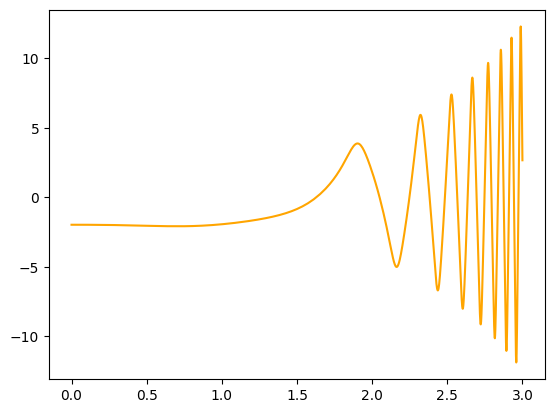

In [ ]:
draw2()

In [ ]:
def draw22():
  y=0
  x=-2
  alpha=-4.5
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((1,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin11 = solve_ivp(rhs, [0,-6], (1 + vmin1[b][0]*0.01, y + vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x1,y1=Solmin11.y
    tim1 = Solmin11.t
    plt.plot(tim1,x1)
    Solmin12 = solve_ivp(rhs, [0,-6], (1 - vmin1[b][0]*0.01, y - vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x2,y2=Solmin12.y
    tim2 = Solmin12.t
    plt.plot(tim2,x2)

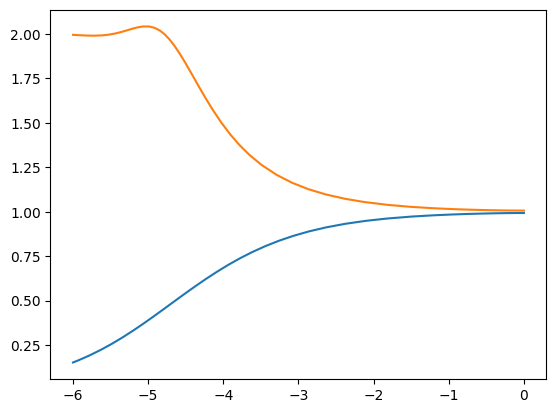

In [ ]:
draw22()

3. $α\in (-4,0)$

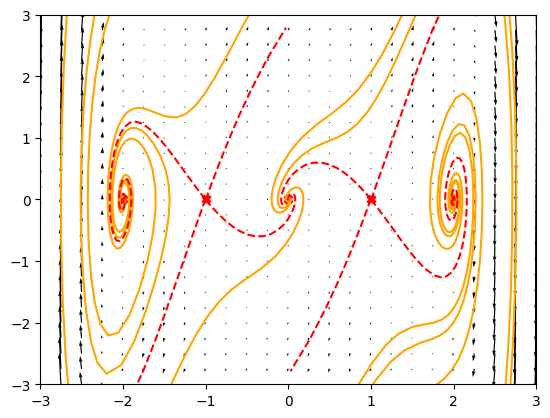

In [ ]:
def phase3():
  alpha=-2
  rhs = funct(alpha)
  plt.close()
  plotonPlane(rhs,[[-3,3],[-3,3]])
  plt.scatter(0,0, color='red', marker='X')
  plt.scatter(2,0, color='red', marker='X')
  plt.scatter(-2,0, color='red', marker='X')

  plt.scatter(-1,0, color='red', marker='X')
  plt.scatter(1,0, color='red', marker='X')

  focus2(2, alpha)
  focus2(-2,alpha)
  sedlo1(-1, alpha)
  sedlo1(1, alpha)
  focus2(0,alpha)

phase3()

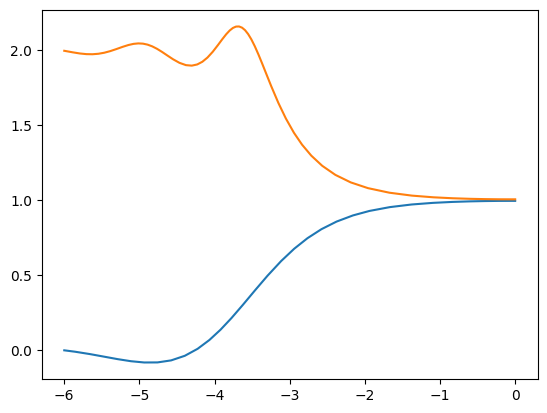

In [ ]:
def draw3():
  y=0
  x=-2
  alpha=-2
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((1,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin11 = solve_ivp(rhs, [0,-6], (1 + vmin1[b][0]*0.01, y + vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x1,y1=Solmin11.y
    tim1 = Solmin11.t
    plt.plot(tim1,x1)
    Solmin12 = solve_ivp(rhs, [0,-6], (1 - vmin1[b][0]*0.01, y - vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x2,y2=Solmin12.y
    tim2 = Solmin12.t
    plt.plot(tim2,x2)
draw3()

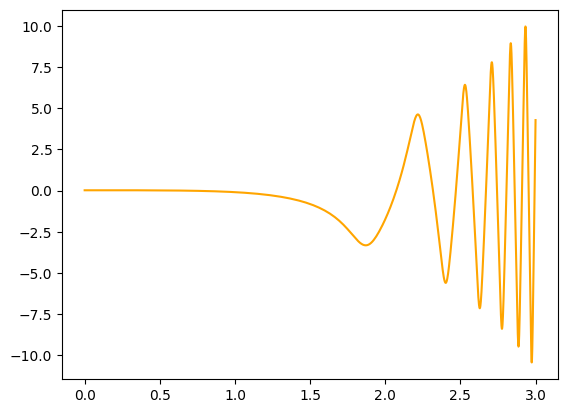

In [ ]:
def draw33():
  y=0
  x=0
  alpha=-4.5
  rhs=funct(alpha)
  timeSp=[0,2]
  if(alpha<0):#неустойчивый фокус
    timeSp=[0,3]
  if(alpha>0):#устойчивый фокус
    timeSp=[0,-2]
  Solmin11 = solve_ivp(rhs, timeSp, (x + 0.02, y + 0.01), method='RK45', rtol=1e-8)
  x1,y1=Solmin11.y
  tim1=Solmin11.t
  plt.plot(tim1,x1,color='orange')
draw33()

$α=0$

In [ ]:
alpha=0
rhs = funct(alpha)

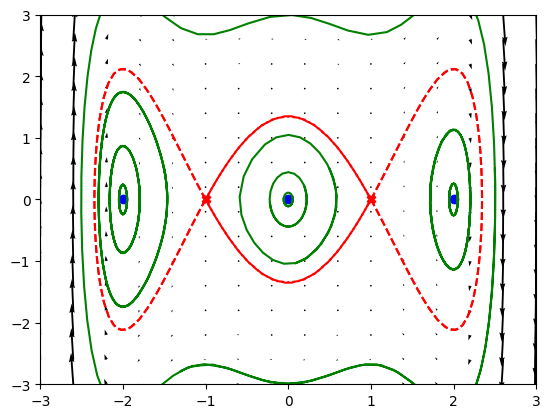

In [ ]:
plt.close()
plotonPlane(rhs,[[-3,3],[-3,3]])
plt.scatter(0,0, color='blue')
plt.scatter(2,0, color='blue')
plt.scatter(-2,0, color='blue')

plt.scatter(-1,0, color='red', marker='X')
plt.scatter(1,0, color='red', marker='X')

drawSedlo(-1,0,alpha)
drawSedlo(1,0,alpha)
drawCentre(-2,0,alpha)
drawCentre(0,0,alpha)
drawCentre(2,0,alpha)

$α\in (0,4)$

In [ ]:
alpha=2
rhs = funct(alpha)

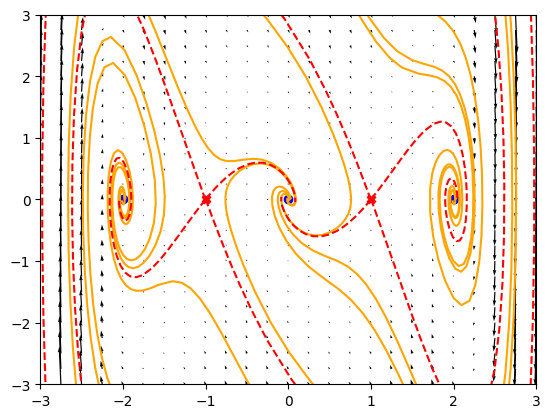

In [ ]:
def phase4():
  alpha = 2
  rhs = funct(alpha)
  plt.close()
  plotonPlane(rhs,[[-3,3],[-3,3]])
  plt.scatter(0,0, color='blue')
  plt.scatter(2,0, color='blue')
  plt.scatter(-2,0, color='blue')

  plt.scatter(-1,0, color='red', marker='X')
  plt.scatter(1,0, color='red', marker='X')

  Sol = solve_ivp(rhs, [0,10], (-0.3, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (0.3, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')


  focus2(2, alpha)
  focus2(-2,alpha)
  focus2(0,alpha)
  sedlo2(-1, alpha)
  sedlo2(1, alpha)

phase4()

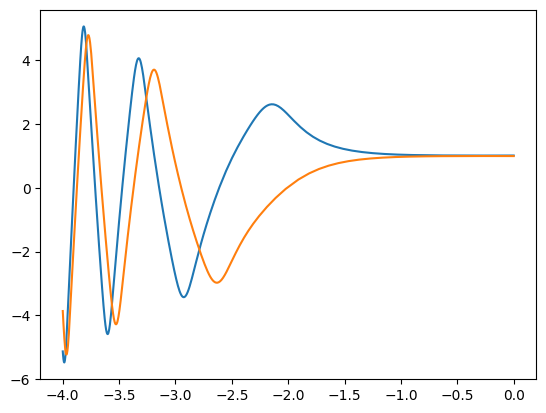

In [ ]:
def draw4():
  alpha=2
  x=1
  y=0
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((x,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin13 = solve_ivp(rhs, [0,-4], (x + vmin1[b][0]*0.01, y + vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x3,y3=Solmin13.y
    tim3=Solmin13.t
    plt.plot(tim3,x3)#+
    Solmin14 = solve_ivp(rhs, [0,-4], (x - vmin1[b][0]*0.01, y - vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    x4,y4=Solmin14.y
    tim4=Solmin14.t
    plt.plot(tim4,x4)#+
draw4()

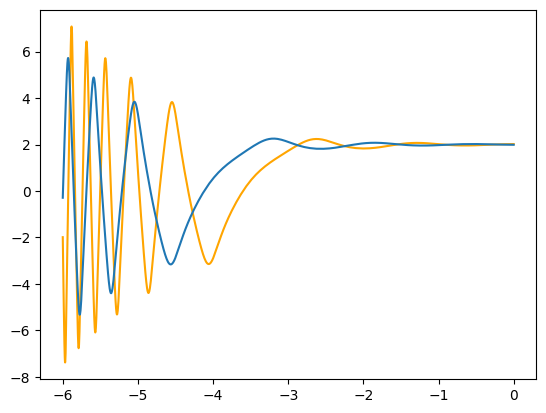

In [ ]:
def draw44():
  alpha=2
  x=2
  rhs = funct(alpha)
  y=0
  timeSp=[0,2]
  if(alpha<0):#неустойчивый фокус
    timeSp=[0,6]
  if(alpha>0):#устойчивый фокус
    timeSp=[0,-6]
  Solmin11 = solve_ivp(rhs, timeSp, (x + 0.02, y + 0.01), method='RK45', rtol=1e-8)
  x1,y1=Solmin11.y
  tim1=Solmin11.t
  plt.plot(tim1,x1,color='orange')
  Solmin12 = solve_ivp(rhs, timeSp, (x - 0.01, y - 0.03), method='RK45', rtol=1e-8)
  x2,y2=Solmin12.y
  tim2=Solmin12.t
  plt.plot(tim2,x2)
draw44()

 $α\in (4,4\sqrt{6})$

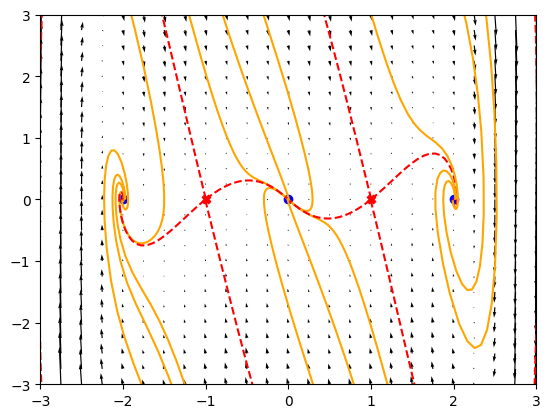

In [ ]:
def phase5():
  alpha = 4.5
  rhs = funct(alpha)
  plt.close()
  plotonPlane(rhs,[[-3,3],[-3,3]])
  plt.scatter(0,0, color='blue')
  plt.scatter(2,0, color='blue')
  plt.scatter(-2,0, color='blue')

  plt.scatter(-1,0, color='red', marker='X')
  plt.scatter(1,0, color='red', marker='X')

  Sol = solve_ivp(rhs, [0,10], (-0.3, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (0.3, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (-1.2, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (1.2, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (-1.9, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')


  node1(0,alpha)
  sedlo3(-1, alpha)
  sedlo3(1, alpha)
  focus1(2, alpha)
  focus1(-2,alpha)

phase5()

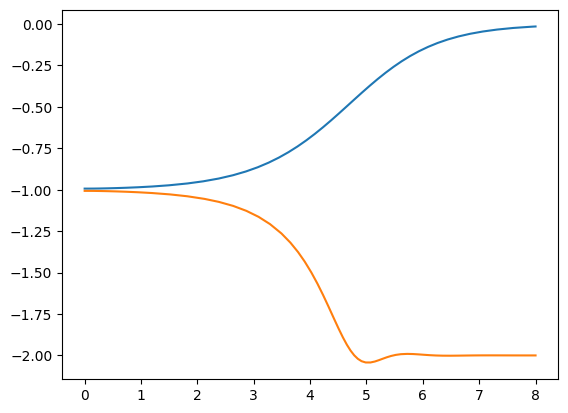

In [ ]:
def draw5():
  x=-1
  y=0
  alpha=4.5
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((x,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin11 = solve_ivp(rhs, [0,8], (x + vmin1[a][0]*0.01, y + vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x1,y1=Solmin11.y
    tim1=Solmin11.t
    plt.plot(tim1,x1)
    Solmin12 = solve_ivp(rhs, [0,8], (x - vmin1[a][0]*0.01, y - vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x2,y2=Solmin12.y
    tim2=Solmin12.t
    plt.plot(tim2,x2)
draw5()

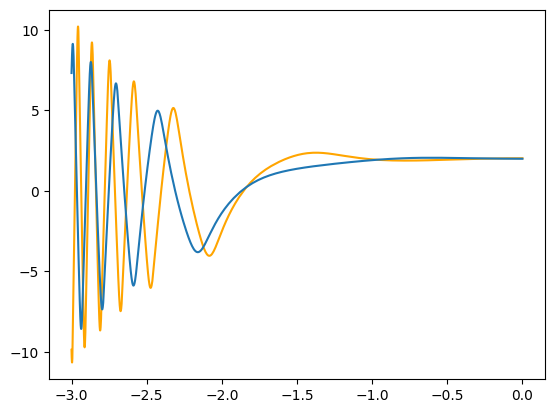

In [ ]:
def draw55():
  alpha=4.5
  rhs = funct(alpha)
  y=0
  x=2
  timeSp=[0,2]
  if(alpha<0):#неустойчивый фокус
    timeSp=[0,3]
  if(alpha>0):#устойчивый фокус
    timeSp=[0,-3]
  Solmin11 = solve_ivp(rhs, timeSp, (x + 0.02, y + 0.01), method='RK45', rtol=1e-8)
  x1,y1=Solmin11.y
  tim1=Solmin11.t
  plt.plot(tim1,x1,color='orange')
  Solmin12 = solve_ivp(rhs, timeSp, (x - 0.01, y - 0.03), method='RK45', rtol=1e-8)
  x2,y2=Solmin12.y
  tim2=Solmin12.t
  plt.plot(tim2,x2)
draw55()

$α\in (4\sqrt{6},+\infty)$

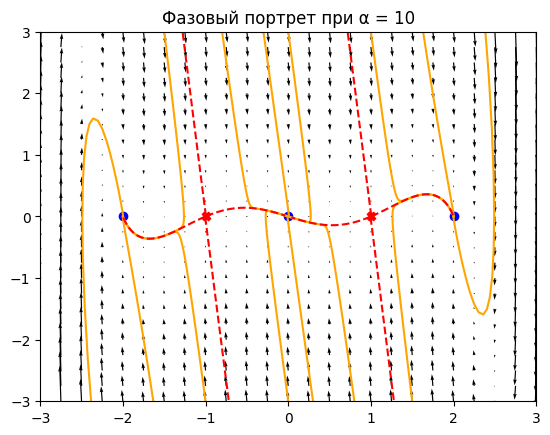

In [ ]:
def phase6():
  alpha=10
  rhs = funct(alpha)
  plotonPlane(rhs,[[-3,3],[-3,3]])
  plt.scatter(0,0, color='blue')
  plt.scatter(2,0, color='blue')
  plt.scatter(-2,0, color='blue')
  plt.scatter(-1,0, color='red', marker='X')
  plt.scatter(1,0, color='red', marker='X')
  plt.title('Фазовый портрет при α = 10')

  Sol = solve_ivp(rhs, [0,10], (-1, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (-0.8, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (0, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (0, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (0.8, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (1, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (-1.5, 3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  Sol = solve_ivp(rhs, [0,10], (1.5, -3), method='RK45', rtol=1e-10)
  xs,ys=Sol.y
  plt.plot(xs,ys,color='orange')

  node1(0, alpha)
  node1(2,alpha)
  node1(-2,alpha)
  sedlo4(-1,alpha)
  sedlo4(1,alpha)



phase6()


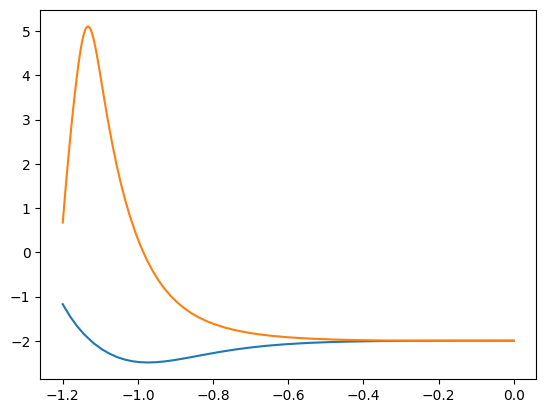

In [ ]:
def draw6():
  y=0
  x=-2
  alpha=10
  rhs=funct(alpha)
  w,v=F_vect_num((x,y),alpha)
  if(w[0]>0):# неустойчивый узел
    timeSp=[0,2]
  else:#устойчивый узел
      timeSp=[0,-1.2]
  if(abs(w[0])<abs(w[1])):#для ведущего направления берем первый собственный вектор
      a=0
  else: #для ведущего направления берем второй собственный вектор
      a=1
  SolVed1 = solve_ivp(rhs, timeSp, (x + v[a][0]*0.01, y + v[a][1]*0.01), method='RK45', rtol=1e-8)
  xv1,yv1=SolVed1.y
  tim1 = SolVed1.t
  plt.plot(tim1,xv1)
  SolVed2 = solve_ivp(rhs, timeSp, (x - v[a][0]*0.01, y - v[a][1]*0.01), method='RK45', rtol=1e-8)
  xv2,yv2=SolVed2.y
  tim2=SolVed2.t
  plt.plot(tim2,xv2)
draw6()

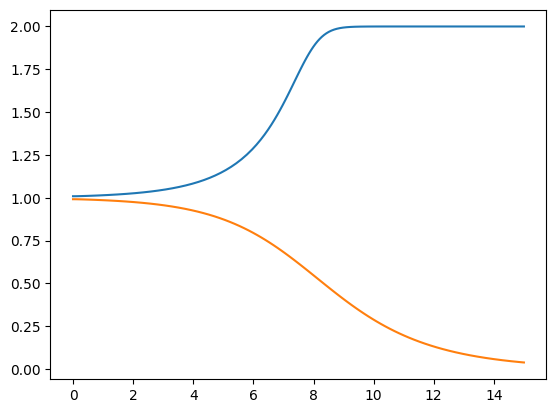

In [ ]:
def draw66():
  y=0
  x=1
  alpha=10
  rhs=funct(alpha)
  if(1):
    wmin1,vmin1=F_vect_num((x,y),alpha)
    if(wmin1[0]<0): #какая из сепаратрис устойчивая(чтобы нарисовать ее в прямом времени)
      a=1
      b=0
    else:
      b=1
      a=0
    Solmin11 = solve_ivp(rhs, [0,15], (x + vmin1[a][0]*0.01, y + vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x1,y1=Solmin11.y
    tim1=Solmin11.t
    plt.plot(tim1,x1)
    Solmin12 = solve_ivp(rhs, [0,15], (x - vmin1[a][0]*0.01, y - vmin1[a][1]*0.01), method='RK45', rtol=1e-8)
    x2,y2=Solmin12.y
    tim2=Solmin12.t
    plt.plot(tim2,x2)
    # Solmin13 = solve_ivp(rhs, [0,-1], (x + vmin1[b][0]*0.01, y + vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    # x3,y3=Solmin13.y
    # tim3=Solmin13.t
    # plt.plot(tim3,x3)#+
    # Solmin14 = solve_ivp(rhs, [0,-1], (x - vmin1[b][0]*0.01, y - vmin1[b][1]*0.01), method='RK45', rtol=1e-8)
    # x4,y4=Solmin14.y
    # tim4=Solmin14.t
    # plt.plot(tim4,x4)
draw66()